In [1]:
import re
import os
import sys
import h5py
import time
import numpy as np
import scipy as sp
import mindspore as ms
from numpy.linalg import eig, norm
from scipy.sparse import csr_matrix
from scipy.optimize import minimize
from mindquantum.framework import *
from mindquantum.core.gates import *
from scipy.stats import unitary_group
from mindquantum.core.circuit import *
from IPython.display import display_svg
from mindquantum.core.operators import *
from mindquantum.algorithm.nisq import *
from scipy.linalg import block_diag, sqrtm
from mindspore.common.initializer import *
from mindquantum.simulator import Simulator
from mindquantum.algorithm.compiler import *

np.set_printoptions(linewidth=200)

[[0.34880034+0.j         0.40977999-0.24334959j]
 [0.40977999+0.24334959j 0.65119966+0.j        ]] (1+0j)
[[-0.30155987-0.50780113j  0.70856123+0.38618732j]
 [ 0.69384473+0.41204265j  0.59059321+0.j        ]] (0.2890333438755997-0.507801129358764j)
[0.53639729-0.17207415j 0.7502259 +0.17207415j]
[0.28779342-0.08599395j 0.90823478+0.29135815j]
[[-0.30155987-0.50780113j  0.70856123+0.38618732j]
 [ 0.69384473+0.41204265j  0.59059321+0.j        ]] (0.2890333438755997-0.507801129358764j)


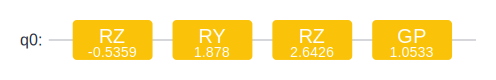

In [50]:
r = h5py.File('mat/322_d2_num1_model957_RDM_v7.3.mat', 'r')
l = list(r.keys())
rdm = [r[i][:].view('complex').T for i in l]
rdm.insert(0, [])
r.close()

np.random.seed(42)
gate = np.random.rand(2) + 1j * np.random.rand(2)
gate /= norm(gate)
gate = np.outer(gate.conj(), gate)
print(gate, np.trace(gate))
gate_u = UnivMathGate('gate', gate).on(0)
gate_d = euler_decompose(gate_u)
print(gate_d.matrix(), np.trace(gate_d.matrix()))

circ_u = Circuit() + gate_u
circ_d = Circuit() + gate_d
sim_u = Simulator('mqvector', 1)
sim_u.apply_gate(H(0))
sim_u.apply_circuit(circ_u)
print(sim_u.get_qs())
sim_d = Simulator('mqvector', 1)
sim_d.apply_gate(H(0))
sim_d.apply_circuit(circ_d)
print(sim_d.get_qs())
print(circ_d.matrix(), np.trace(circ_d.matrix()))

circ_d.svg()

In [61]:
import numpy as np
from scipy import linalg

u1u2h = np.array([[1, 2], [2, 1]])
eigvals, v = linalg.eigh(u1u2h)
print(eigvals, eigvals.dtype)
# eigvals = eigvals.astype(np.complex128)
print(eigvals, eigvals.dtype)
dvals = np.sqrt(eigvals)
print(dvals, dvals.dtype)

[-1.  3.] float64
[-1.  3.] float64
[       nan 1.73205081] float64


C:\Users\ghost\AppData\Local\Temp\ipykernel_28740\728509003.py:9: RuntimeWarning: invalid value encountered in sqrt
  dvals = np.sqrt(eigvals)
